In [49]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

#max tension 
Tmax = 2

 #gravity
g = np.array([[0],[-9.8]])                         

# Mass of the load
m = 0.1

 #time step
h = 0.1

#initial , final postition
p_init = np.array([0,0])
p_dest = np.array([10,2])

#theta is 15 degrees
theta = np.pi/12
temp = np.array([[-1*np.sin(theta),np.sin(theta)],
                [np.cos(theta),np.cos(theta)]])     #array that resolves T_right and T_left into directional components for force equation  


# Run bisectionAlgo
upper = 100
lower = 10

#hold optimal values and lower considered as infeasible and upper as feasible
T_val = 0
P_val = 0

while lower < upper-1:
  k = int((upper + lower)/2)
  T = cp.Variable((2,k-1))
  P = cp.Variable((2,k))
  V = cp.Variable((2,k))
  F = temp*T + m*np.tile(g,k-1)
  
  #objective
  objective = cp.Minimize(0)                        #only checking feasibility
  
  #constraints
  constraints = [ T >= 0, T <= Tmax, V[:, 0] == 0, V[:, k-1] == 0, V[:, 1:k] == V[:, 0:k-1] + h*F/m, P[:, 0] == p_init, P[:, k-1] == p_dest, P[:, 1:k] == P[:, 0:k-1] + h*V[:, 0:k-1]]
  
  #prob
  prob = cp.Problem(objective,constraints)
  result = prob.solve()
  if result != 0:
    lower = k
  else:
    upper = k
    k_opt = upper
    P_val = P.value
    T_val = T.value

#Results
print('Minimum value of k is',k_opt)
print('Minimum time is',k_opt*h)


Minimum value of k is 34
Minimum time is 3.4000000000000004


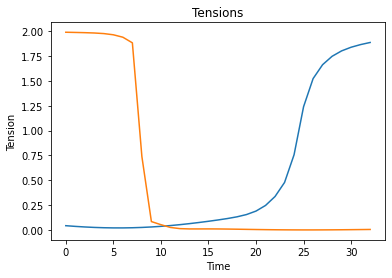

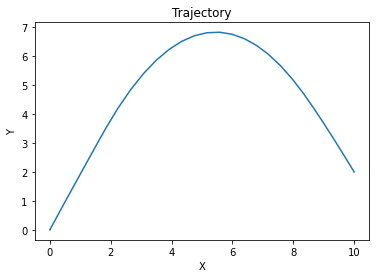

In [45]:
#Graphs 
plt.plot(T_val.T)
plt.ylabel('Tension')
plt.xlabel('Time')
plt.title('Tensions')
plt.show()
plt.plot(P_val[0,:],P_val[1,:])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Trajectory')
plt.show()
